In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from statsmodels.stats.multitest import multipletests
import matplotlib.lines as mlines


In [2]:
# define path
path = '/Users/laurituominen/Documents/Research/Reettis/neuromaps/'

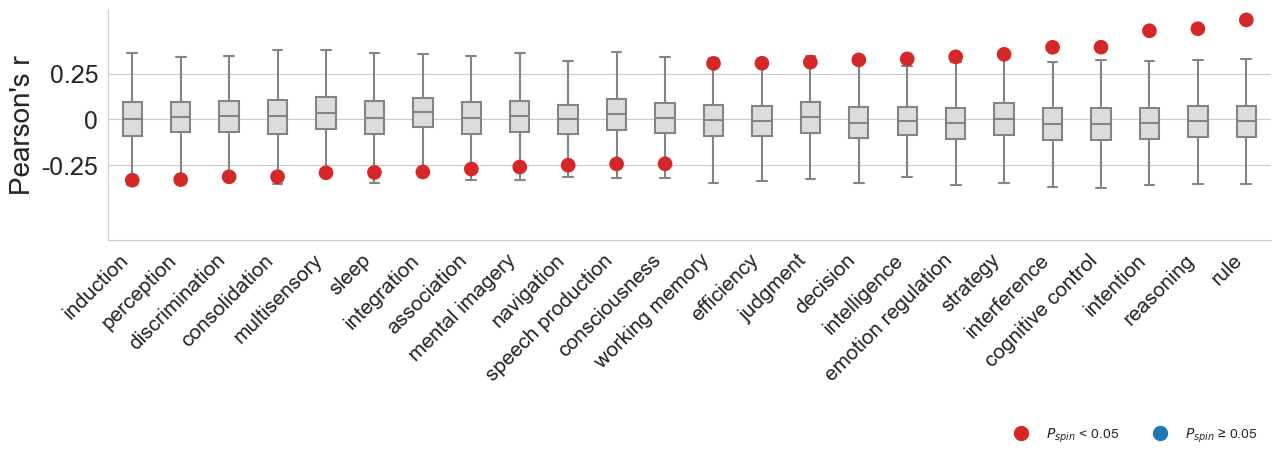

In [3]:
# get turku data for plotting 
corrs_turku_ns = dict(np.load(path + 'data/corrs_turku_neurosynth.npz'))
nulls_turku_ns = dict(np.load(path + 'data/nulls_turku_neurosynth.npz'))

# get dataframes
df_nulls = pd.DataFrame.from_dict(nulls_turku_ns)
df_corrs = pd.DataFrame.from_dict(corrs_turku_ns, orient='index') 
df_corrs.columns = ['rho', 'pspin']

# colors based on p-values
color = ((df_corrs['pspin'] > 0.05).astype(int)).tolist()
color = [(0.839, 0.152, 0.156) if x == 0 else (0.121, 0.466, 0.705) for x in color]
x = np.arange(df_corrs.shape[0])
cpalette = dict(zip(x, color))
    
# plots 
fig = plt.figure(figsize=(15,3))
sns.set_style("whitegrid")

plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

ax1 = sns.boxplot(data=df_nulls, width=0.4, fliersize=0, color ='gainsboro', zorder=0)
ax2 = sns.pointplot(x=x,
              y=df_corrs['rho'],
              palette=cpalette,
              join = False , 
              scale=1.2);

# fix zorder
children1 = ax1.get_children()
children2 = ax2.get_children()

# Set the zorder of the children of the boxplot to 1
for child in children1:
    child.set_zorder(10)

# Set the zorder of the children of the pointplot to 2
for child in children2:
    child.set_zorder(20)

ax1.set_axisbelow(True)

# labels and such
ax1.set(yticks=[-.25, 0, .25])
ax1.set_yticklabels(['-0.25', '0', '0.25'],zorder=3)
xlabel = [k.replace('_', ' ') for k in corrs_turku_ns.keys() ]
ax1.set_xticklabels(xlabel, rotation=45, ha="right", fontsize=15)
ax1.set_ylabel("Pearson's r", fontsize=20)
ax1.tick_params(axis='y', labelsize=18)

blue_circle = mlines.Line2D([], [], color=(0.839, 0.152, 0.156), marker='o', linestyle='None',
                          markersize=10, label='$P_{spin}$ < 0.05')
red_circle = mlines.Line2D([], [], color=(0.121, 0.466, 0.705), marker='o', linestyle='None',
                          markersize=10, label='$P_{spin}$ ≥ 0.05')

plt.legend(handles=[blue_circle, red_circle], frameon=False, bbox_to_anchor=(1, -0.75), ncol=2)

#plt.savefig(path + 'figures/Figure4.jpg', bbox_inches="tight", dpi=300) 

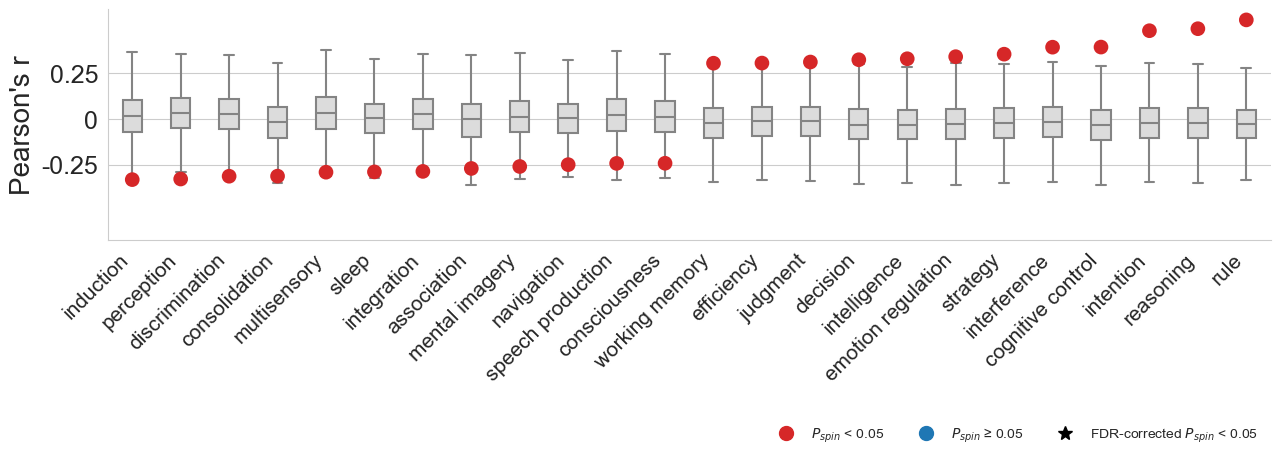

In [5]:
# get ENIGMA data 
corrs_enigma_ns = dict(np.load(path + 'data/corrs_enigma_neurosynth.npz'))
nulls_enigma_ns = dict(np.load(path + 'data/nulls_enigma_neurosynth.npz'))

# dataframes 
df_nulls = pd.DataFrame.from_dict(nulls_enigma_ns)
df_corrs = pd.DataFrame.from_dict(corrs_enigma_ns, orient='index') 
df_corrs.columns = ['rho', 'pspin']

# add the FDR corrected p-values as a new column to the dataframe
_, fdr_corrected_pvalues, _, _ = multipletests(df_corrs['pspin'], alpha=0.05, method='fdr_bh')

# add the FDR corrected p-values as a new column to the dataframe
df_corrs['fdr_corrected_p_value'] = fdr_corrected_pvalues

# colors  based on p-vals 
color = ((df_corrs['pspin'] > 0.05).astype(int)).tolist()
color = [(0.839, 0.152, 0.156) if x == 0 else (0.121, 0.466, 0.705) for x in color]
x = np.arange(df_corrs.shape[0])
cpalette = dict(zip(x, color))
    
# plot
fig = plt.figure(figsize=(15,3))
sns.set_style("whitegrid")

plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

ax1 = sns.boxplot(data=df_nulls, width=0.4, fliersize=0, color ='gainsboro')
ax2 = sns.pointplot(x=x,
              y=df_corrs['rho'],
              palette=cpalette,
              join = False , 
              scale=1.2,
              ax=ax1);


# fix zorder
children1 = ax1.get_children()
children2 = ax2.get_children()

# Set the zorder of the children of the boxplot to 1
for child in children1:
    child.set_zorder(10)

# Set the zorder of the children of the pointplot to 2
for child in children2:
    child.set_zorder(20)

ax1.set_axisbelow(True)

ax1.set(yticks=[-.25, 0, .25])

ax1.set_yticklabels(['-0.25', '0', '0.25'])
xlabel = [k.replace('_', ' ') for k in corrs_enigma_ns.keys() ]
ax1.set_xticklabels(xlabel, rotation=45, ha="right", fontsize=15)
ax1.set_ylabel("Pearson's r", fontsize=20)
ax1.tick_params(axis='y', labelsize=18)

blue_circle = mlines.Line2D([], [], color=(0.839, 0.152, 0.156), marker='o', linestyle='None',
                          markersize=10, label='$P_{spin}$ < 0.05')
red_circle = mlines.Line2D([], [], color=(0.121, 0.466, 0.705), marker='o', linestyle='None',
                          markersize=10, label='$P_{spin}$ ≥ 0.05' )
black_star = mlines.Line2D([], [], color='black', marker='*', linestyle='None',
                          markersize=10, label='FDR-corrected $P_{spin}$ < 0.05' )

plt.legend(handles=[blue_circle, red_circle, black_star], frameon=False, bbox_to_anchor=(1, -0.75), ncol=3)

#plt.savefig(path + 'figures/Figure4.jpg', bbox_inches="tight", dpi=300) 